In [1]:
import numpy as np
import gc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
#from sklearn.neighbors import KDTree
import threading
from numpy import linalg as LA
from sympy import Plane, Point3D
import pandas as pd
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import math
import copy
import sys
import os
from os.path import isfile, join
from scipy.spatial import cKDTree
from scipy.optimize import curve_fit
import scipy
from scipy import integrate
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

plt.rcParams['font.weight'] = 'normal'
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='stixgeneral'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 20
plt.rc('figure', facecolor='w')

## Constants in cgs unites
G=6.67408e-8
H=67.26*3.2408e-20
k_B=1.38064852e-16
M_sun=1.99e+33
pc=3.086e18
kpc=3.086e21
Mpc=3.086e24
Gyr=365*24*3600*1e9
Myr=365*24*3600*1e6
m_p=1.6726219e-24
eV=1.602176634e-12
h_bar=1.0545718e-27
c=2.99792458e10
au=1.496e13

h=0.6774

## Constants in mks unites
k_B=1.38064852e-23
Gyr=365*24*3600*1e9
Myr=365*24*3600*1e6
m_p=1.6726219e-27
eV=1.602176634e-19
h_bar=1.0545718e-34
c=2.99792458e8

In [9]:
df=pd.read_csv('/scratch/08308/joohyunl/grav/mods_90/m1.2b0.0v30.0r1/intmom.out',sep='\s+',header=0)
df

,R,Theta,V_r,V_theta,V_rV_t,V_phi,v_phi,beta
0,0.41,5.77,1.2552,2.8122,0.0,1.5158,0.0,-2.2390
1,1.16,5.77,1.0226,3.9281,0.0,3.2107,0.0,-11.3059
2,2.09,5.77,0.7538,5.1800,0.0,4.6520,0.0,-41.6550
3,3.24,5.77,1.6862,4.7202,0.0,7.9712,0.0,-14.0925
4,4.68,5.77,1.1958,9.9029,0.0,7.1423,0.0,-51.1289
...,...,...,...,...,...,...,...,...
95,76.60,71.57,16.9012,17.3320,0.0,17.7246,0.0,-0.0757
96,95.71,71.57,15.2557,16.0199,0.0,16.5495,0.0,-0.1398
97,119.41,71.57,15.4663,14.7234,0.0,15.1806,0.0,0.0652
98,148.83,71.57,15.0461,13.1379,0.0,13.3147,0.0,0.2272


In [18]:
print(r)

[  0.41   1.16   2.09   3.24   4.68   6.46   8.66  11.4   14.8   19.02
  24.25  30.75  38.8   48.8   61.21  76.6   95.71 119.41 148.83 185.33
   0.41   1.16   2.09   3.24   4.68   6.46   8.66  11.4   14.8   19.02
  24.25  30.75  38.8   48.8   61.21  76.6   95.71 119.41 148.83 185.33
   0.41   1.16   2.09   3.24   4.68   6.46   8.66  11.4   14.8   19.02
  24.25  30.75  38.8   48.8   61.21  76.6   95.71 119.41 148.83 185.33
   0.41   1.16   2.09   3.24   4.68   6.46   8.66  11.4   14.8   19.02
  24.25  30.75  38.8   48.8   61.21  76.6   95.71 119.41 148.83 185.33
   0.41   1.16   2.09   3.24   4.68   6.46   8.66  11.4   14.8   19.02
  24.25  30.75  38.8   48.8   61.21  76.6   95.71 119.41 148.83 185.33]


In [17]:
r=np.array(df['R'])
beta=np.array(df['beta'])

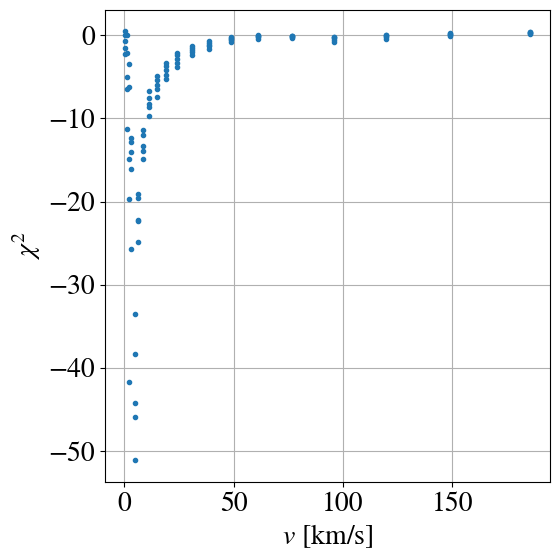

In [13]:
# figure
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

ax1.plot(r, beta, '.')

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.grid()

ax1.set_xlabel('$v$ [km/s]')
ax1.set_ylabel('$\chi^{2}$')

plt.tight_layout()

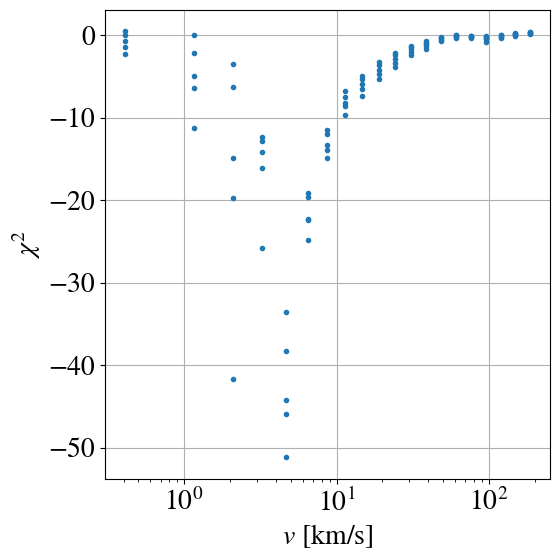

In [20]:
# figure
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

ax1.plot(r, beta, '.')

ax1.set_xscale('log')

ax1.grid()

ax1.set_xlabel('$v$ [km/s]')
ax1.set_ylabel('$\chi^{2}$')

plt.tight_layout()